In [1]:
#importing the essential libraries for playing with tables
In [1]: import numpy as np

In [2]: import pandas as pd

In [2]:
# Pandas provides two types of classes for handling data:

# Series: a one-dimensional labeled array holding data of any type
# such as integers, strings, Python objects etc.

# DataFrame: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

In [8]:
In [3]: s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [9]:
# Creating a DataFrame by passing a NumPy array with a datetime index using date_range() and labeled columns:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-1.938251,-1.696592,0.398964,0.093026
2013-01-02,-0.431488,-0.925886,-0.264291,1.364809
2013-01-03,-0.217503,-1.059327,0.370565,0.482701
2013-01-04,-0.706119,-0.268074,0.676048,-1.223312
2013-01-05,-0.066135,0.424626,-0.028122,-0.058595
2013-01-06,1.258087,0.480765,0.011748,0.839693


In [12]:
# creating a DataFrame by passing a dictionary of objects where the keys are the column labels and the values are the column values.
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [14]:
#the datatypes of different columns of above df2 data frame
df2.dtypes


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [16]:
df2.A,df2.B

(0    1.0
 1    1.0
 2    1.0
 3    1.0
 Name: A, dtype: float64,
 0   2013-01-02
 1   2013-01-02
 2   2013-01-02
 3   2013-01-02
 Name: B, dtype: datetime64[ns])

In [17]:
#we can view the data using head and tail methods
df2.head()#by default it gives first 5 rows
#we can change it as df2.head(x),here x indicates the no of rows we want to display

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [24]:
df2.tail(1)

,A,B,C,D,E,F
3,1.0,2013-01-02,1.0,3,train,foo


In [27]:
df

,A,B,C,D
2013-01-01,-1.938251,-1.696592,0.398964,0.093026
2013-01-02,-0.431488,-0.925886,-0.264291,1.364809
2013-01-03,-0.217503,-1.059327,0.370565,0.482701
2013-01-04,-0.706119,-0.268074,0.676048,-1.223312
2013-01-05,-0.066135,0.424626,-0.028122,-0.058595
2013-01-06,1.258087,0.480765,0.011748,0.839693


In [26]:
#displaying the data frame index
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [28]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [31]:
#we can convert the dataframe into numpy array and we can display 
df.to_numpy()

array([[-1.93825116, -1.69659247,  0.39896372,  0.09302626],
       [-0.4314879 , -0.92588614, -0.26429061,  1.36480859],
       [-0.21750281, -1.05932656,  0.37056458,  0.48270079],
       [-0.70611915, -0.26807389,  0.67604817, -1.22331222],
       [-0.06613542,  0.42462571, -0.02812203, -0.05859512],
       [ 1.2580873 ,  0.48076527,  0.01174807,  0.83969305]])

In [ ]:
# NumPy arrays have one dtype for the entire array while pandas DataFrames have one dtype per column. 
#When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame.
#If the common data type is object, DataFrame.to_numpy() will require copying data.

In [30]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [32]:
df.describe() #method is used to describe the dataframe in the pandas

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.350235,-0.507415,0.194152,0.249720
std,1.033449,0.871361,0.345873,0.887153
min,-1.938251,-1.696592,-0.264291,-1.223312
25%,-0.637461,-1.025966,-0.018155,-0.020690
50%,-0.324495,-0.596980,0.191156,0.287864
75%,-0.103977,0.251451,0.391864,0.750445
max,1.258087,0.480765,0.676048,1.364809


In [33]:
df.T#gives the transpose of the dataframe


,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.938251,-0.431488,-0.217503,-0.706119,-0.066135,1.258087
B,-1.696592,-0.925886,-1.059327,-0.268074,0.424626,0.480765
C,0.398964,-0.264291,0.370565,0.676048,-0.028122,0.011748
D,0.093026,1.364809,0.482701,-1.223312,-0.058595,0.839693


In [37]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2013-01-01,0.093026,0.398964,-1.696592,-1.938251
2013-01-02,1.364809,-0.264291,-0.925886,-0.431488
2013-01-03,0.482701,0.370565,-1.059327,-0.217503
2013-01-04,-1.223312,0.676048,-0.268074,-0.706119
2013-01-05,-0.058595,-0.028122,0.424626,-0.066135
2013-01-06,0.839693,0.011748,0.480765,1.258087


In [39]:
df.sort_values(by='A',ascending =False)#big to small withreference to column A

,A,B,C,D
2013-01-06,1.258087,0.480765,0.011748,0.839693
2013-01-05,-0.066135,0.424626,-0.028122,-0.058595
2013-01-03,-0.217503,-1.059327,0.370565,0.482701
2013-01-02,-0.431488,-0.925886,-0.264291,1.364809
2013-01-04,-0.706119,-0.268074,0.676048,-1.223312
2013-01-01,-1.938251,-1.696592,0.398964,0.093026


In [41]:
# The methods like  DataFrame.at(), DataFrame.iat(), DataFrame.loc() and DataFrame.iloc() are very useful in selecting the data in the dataframe

In [44]:
df['A']==df.A #both the notations give the same output

2013-01-01    True
2013-01-02    True
2013-01-03    True
2013-01-04    True
2013-01-05    True
2013-01-06    True
Freq: D, Name: A, dtype: bool

In [45]:
#we can select the sub portions of the dataframe using slicing function [:]
df[0:3]

,A,B,C,D
2013-01-01,-1.938251,-1.696592,0.398964,0.093026
2013-01-02,-0.431488,-0.925886,-0.264291,1.364809
2013-01-03,-0.217503,-1.059327,0.370565,0.482701


In [54]:
df["20130101":"20130106"]

,A,B,C,D
2013-01-01,-1.938251,-1.696592,0.398964,0.093026
2013-01-02,-0.431488,-0.925886,-0.264291,1.364809
2013-01-03,-0.217503,-1.059327,0.370565,0.482701
2013-01-04,-0.706119,-0.268074,0.676048,-1.223312
2013-01-05,-0.066135,0.424626,-0.028122,-0.058595
2013-01-06,1.258087,0.480765,0.011748,0.839693


In [63]:
df.loc[dates[1]]#printing the row wise values

A   -0.431488
B   -0.925886
C   -0.264291
D    1.364809
Name: 2013-01-02 00:00:00, dtype: float64

In [64]:
df.loc[dates[1]]==df.iloc[1] #the above command and this command are equal

A    True
B    True
C    True
D    True
Name: 2013-01-02 00:00:00, dtype: bool

In [66]:
df.loc[:,['A','B']] #selecting the subset of columns from the columns in the given dataframe


,A,B
2013-01-01,-1.938251,-1.696592
2013-01-02,-0.431488,-0.925886
2013-01-03,-0.217503,-1.059327
2013-01-04,-0.706119,-0.268074
2013-01-05,-0.066135,0.424626
2013-01-06,1.258087,0.480765


In [71]:
df.loc[dates[0],'A']

-1.938251157873379

In [76]:

df.iloc[3] #selecting the 3 rd row

A   -0.706119
B   -0.268074
C    0.676048
D   -1.223312
Name: 2013-01-04 00:00:00, dtype: float64

In [83]:
df.iloc[[1,2],[1,2,3]] #prints the 1,2 rows with 1,2,3 columns

,B,C,D
2013-01-02,-0.925886,-0.264291,1.364809
2013-01-03,-1.059327,0.370565,0.482701


In [86]:
df.iloc[:,1:2] #all rows with 1indexed column

,B
2013-01-01,-1.696592
2013-01-02,-0.925886
2013-01-03,-1.059327
2013-01-04,-0.268074
2013-01-05,0.424626
2013-01-06,0.480765


In [88]:
df.iloc[1,2]#value at first row and 2 nd column

-0.2642906058669852

In [91]:
df.iat[1,2] #the above command is similar to this command

-0.2642906058669852

In [100]:
df[df.A>0]

,A,B,C,D
2013-01-06,1.258087,0.480765,0.011748,0.839693


In [101]:
df[df>0] #prints all the values which are greater than 0 by leaving all other cells with Nan which means 0

,A,B,C,D
2013-01-01,NaN,NaN,0.398964,0.093026
2013-01-02,NaN,NaN,NaN,1.364809
2013-01-03,NaN,NaN,0.370565,0.482701
2013-01-04,NaN,NaN,0.676048,NaN
2013-01-05,NaN,0.424626,NaN,NaN
2013-01-06,1.258087,0.480765,0.011748,0.839693


In [102]:
df3=df

In [106]:
#new column named E is created 
df3['E']=['one','two','three','four','five','six']

In [107]:
df3 

,A,B,C,D,E
2013-01-01,-1.938251,-1.696592,0.398964,0.093026,one
2013-01-02,-0.431488,-0.925886,-0.264291,1.364809,two
2013-01-03,-0.217503,-1.059327,0.370565,0.482701,three
2013-01-04,-0.706119,-0.268074,0.676048,-1.223312,four
2013-01-05,-0.066135,0.424626,-0.028122,-0.058595,five
2013-01-06,1.258087,0.480765,0.011748,0.839693,six


In [113]:
df3[df3['E'].isin(['two','four'])]


,A,B,C,D,E
2013-01-02,-0.431488,-0.925886,-0.264291,1.364809,two
2013-01-04,-0.706119,-0.268074,0.676048,-1.223312,four


In [115]:
df3[df3['E'].isin(['four'])]

,A,B,C,D,E
2013-01-04,-0.706119,-0.268074,0.676048,-1.223312,four


In [116]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))


In [117]:
df['F']=s1

In [118]:
df

,A,B,C,D,E,F
2013-01-01,-1.938251,-1.696592,0.398964,0.093026,one,NaN
2013-01-02,-0.431488,-0.925886,-0.264291,1.364809,two,1.0
2013-01-03,-0.217503,-1.059327,0.370565,0.482701,three,2.0
2013-01-04,-0.706119,-0.268074,0.676048,-1.223312,four,3.0
2013-01-05,-0.066135,0.424626,-0.028122,-0.058595,five,4.0
2013-01-06,1.258087,0.480765,0.011748,0.839693,six,5.0


In [119]:
df.at[dates[0], "A"] = 0

In [120]:
df

,A,B,C,D,E,F
2013-01-01,0.000000,-1.696592,0.398964,0.093026,one,NaN
2013-01-02,-0.431488,-0.925886,-0.264291,1.364809,two,1.0
2013-01-03,-0.217503,-1.059327,0.370565,0.482701,three,2.0
2013-01-04,-0.706119,-0.268074,0.676048,-1.223312,four,3.0
2013-01-05,-0.066135,0.424626,-0.028122,-0.058595,five,4.0
2013-01-06,1.258087,0.480765,0.011748,0.839693,six,5.0


In [121]:
df.iat[0, 1] = 0
df

,A,B,C,D,E,F
2013-01-01,0.000000,0.000000,0.398964,0.093026,one,NaN
2013-01-02,-0.431488,-0.925886,-0.264291,1.364809,two,1.0
2013-01-03,-0.217503,-1.059327,0.370565,0.482701,three,2.0
2013-01-04,-0.706119,-0.268074,0.676048,-1.223312,four,3.0
2013-01-05,-0.066135,0.424626,-0.028122,-0.058595,five,4.0
2013-01-06,1.258087,0.480765,0.011748,0.839693,six,5.0


In [122]:
df.loc[:, "D"] = np.array([5] * len(df))

In [123]:
df

,A,B,C,D,E,F
2013-01-01,0.000000,0.000000,0.398964,5.0,one,NaN
2013-01-02,-0.431488,-0.925886,-0.264291,5.0,two,1.0
2013-01-03,-0.217503,-1.059327,0.370565,5.0,three,2.0
2013-01-04,-0.706119,-0.268074,0.676048,5.0,four,3.0
2013-01-05,-0.066135,0.424626,-0.028122,5.0,five,4.0
2013-01-06,1.258087,0.480765,0.011748,5.0,six,5.0


In [124]:
df2=df.copy
# copying the df dataframe to df2

In [135]:
df2

<bound method NDFrame.copy of                    A         B         C    D      E    F
2013-01-01  0.000000  0.000000  0.398964  5.0    one  NaN
2013-01-02 -0.431488 -0.925886 -0.264291  5.0    two  1.0
2013-01-03 -0.217503 -1.059327  0.370565  5.0  three  2.0
2013-01-04 -0.706119 -0.268074  0.676048  5.0   four  3.0
2013-01-05 -0.066135  0.424626 -0.028122  5.0   five  4.0
2013-01-06  1.258087  0.480765  0.011748  5.0    six  5.0>

In [133]:
df2

<bound method NDFrame.copy of                    A         B         C    D      E    F
2013-01-01  0.000000  0.000000  0.398964  5.0    one  NaN
2013-01-02 -0.431488 -0.925886 -0.264291  5.0    two  1.0
2013-01-03 -0.217503 -1.059327  0.370565  5.0  three  2.0
2013-01-04 -0.706119 -0.268074  0.676048  5.0   four  3.0
2013-01-05 -0.066135  0.424626 -0.028122  5.0   five  4.0
2013-01-06  1.258087  0.480765  0.011748  5.0    six  5.0>

In [137]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [138]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [139]:
df1

,A,B,C,D,E,F,E
2013-01-01,0.000000,0.000000,0.398964,5.0,1,NaN,1
2013-01-02,-0.431488,-0.925886,-0.264291,5.0,1,1.0,1
2013-01-03,-0.217503,-1.059327,0.370565,5.0,three,2.0,three
2013-01-04,-0.706119,-0.268074,0.676048,5.0,four,3.0,four


In [185]:
df1.dropna(how='any')

,A,B,C,D,E,F,E
2013-01-02,-0.431488,-0.925886,-0.264291,5.0,1,1.0,1
2013-01-03,-0.217503,-1.059327,0.370565,5.0,three,2.0,three
2013-01-04,-0.706119,-0.268074,0.676048,5.0,four,3.0,four


In [186]:
df1.fillna(value=5)

,A,B,C,D,E,F,E
2013-01-01,0.000000,0.000000,0.398964,5.0,1,5.0,1
2013-01-02,-0.431488,-0.925886,-0.264291,5.0,1,1.0,1
2013-01-03,-0.217503,-1.059327,0.370565,5.0,three,2.0,three
2013-01-04,-0.706119,-0.268074,0.676048,5.0,four,3.0,four


In [187]:
df=df.fillna(value=5)

In [188]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.398964,5.0,5.0
2013-01-02,-0.431488,-0.925886,-0.264291,5.0,1.0
2013-01-03,-0.217503,-1.059327,0.370565,5.0,2.0
2013-01-04,-0.706119,-0.268074,0.676048,5.0,3.0
2013-01-05,-0.066135,0.424626,-0.028122,5.0,4.0
2013-01-06,1.258087,0.480765,0.011748,5.0,5.0


In [189]:
pd.isna(df) #the above command gives the same result as this command


,A,B,C,D,F
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,False,False,False
2013-01-06,False,False,False,False,False


In [192]:
# df=df.drop('E',axis=1) #here i dropped E column as its having string number .so inorder to compute stats i removed


In [191]:
df.mean()

A   -0.027193
B   -0.224649
C    0.194152
D    5.000000
F    3.333333
dtype: float64

In [193]:
df.mean(axis=1) #finding the mean column wise

2013-01-01    2.079793
2013-01-02    0.875667
2013-01-03    1.218747
2013-01-04    1.540371
2013-01-05    1.866074
2013-01-06    2.350120
Freq: D, dtype: float64

In [195]:
df.mean(axis=0)# finding the mean row wise ->default

A   -0.027193
B   -0.224649
C    0.194152
D    5.000000
F    3.333333
dtype: float64

In [196]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [197]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [198]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.217503,-2.059327,-0.629435,4.0,1.0
2013-01-04,-3.706119,-3.268074,-2.323952,2.0,0.0
2013-01-05,-5.066135,-4.575374,-5.028122,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [199]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.398964,5.0,5.0
2013-01-02,-0.431488,-0.925886,-0.264291,5.0,1.0
2013-01-03,-0.217503,-1.059327,0.370565,5.0,2.0
2013-01-04,-0.706119,-0.268074,0.676048,5.0,3.0
2013-01-05,-0.066135,0.424626,-0.028122,5.0,4.0
2013-01-06,1.258087,0.480765,0.011748,5.0,5.0


In [208]:
# DataFrame.agg() and DataFrame.transform() 
#applies a user defined function that reduces or broadcasts its result respectively.
df.agg(lambda x: np.mean(x) * 5.6)

A          -0.852772
B          -7.045001
C           6.088606
D         156.800000
F         104.533333
C_mean           NaN
dtype: float64

In [211]:
# df['C_mean']=df.agg(lambda x: np.mean(x) * 5.6)

In [210]:
df

A         -0.152281
B         -1.258036
C          1.087251
D         28.000000
F         18.666667
C_mean          NaN
dtype: float64

In [212]:
df.transform(lambda x: x * 101.2)

A          -15.410815
B         -127.313232
C          110.029812
D         2833.600000
F         1889.066667
C_mean            NaN
dtype: float64

In [213]:
#value counts
s = pd.Series(np.random.randint(0, 7, size=10))

In [214]:
s


0    4
1    4
2    1
3    3
4    2
5    4
6    0
7    1
8    4
9    5
dtype: int32

In [219]:
s.value_counts()

4    4
1    2
3    1
2    1
0    1
5    1
Name: count, dtype: int64

In [221]:
s.value_counts #observe the difference between both the commands counts(),counts

<bound method IndexOpsMixin.value_counts of 0    4
1    4
2    1
3    3
4    2
5    4
6    0
7    1
8    4
9    5
dtype: int32>

In [222]:
#lets dive into string methods in pandas
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [223]:
s


0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [225]:
s.str.lower() #converting the Upper case alphabets to lower case alphabets

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [230]:
#concatinating two dataframes
df=pd.DataFrame(np.random.randn(10,4))
dt=pd.DataFrame(np.random.rand(10,4))

In [232]:
print(df)
print(dt)

          0         1         2         3
0  1.571037 -0.130894  1.020669  2.465907
1  0.163377 -1.230743  0.312272  0.488686
2  0.171632 -1.149801  0.516103 -0.906729
3 -1.640771  0.300850  0.293545 -0.281944
4  0.542658 -1.116405  1.786844  0.374733
5 -0.156034  1.280694  0.503892  0.213943
6  0.201821  0.152722 -1.130675 -0.693907
7  0.074261 -1.198219 -1.152859  1.967496
8  1.448389 -0.301255  0.696325  1.217420
9  0.002704  0.190120  0.322080  1.136019
          0         1         2         3
0  0.194182  0.740478  0.983354  0.413499
1  0.496889  0.368960  0.848297  0.953663
2  0.211151  0.297648  0.061033  0.345167
3  0.457939  0.620729  0.853396  0.009678
4  0.059525  0.652379  0.386454  0.854991
5  0.618679  0.877164  0.794678  0.903218
6  0.130174  0.442596  0.093422  0.544192
7  0.889653  0.815862  0.319109  0.754754
8  0.253542  0.568889  0.073257  0.008857
9  0.898786  0.592964  0.303514  0.514816


In [239]:
pieces=[df[:1],df[1:2],df[2:]]

In [237]:
pd.concat(pieces)

,0,1,2,3
0,1.571037,-0.130894,1.020669,2.465907
1,0.163377,-1.230743,0.312272,0.488686
2,0.171632,-1.149801,0.516103,-0.906729
3,-1.640771,0.300850,0.293545,-0.281944
4,0.542658,-1.116405,1.786844,0.374733
5,-0.156034,1.280694,0.503892,0.213943
6,0.201821,0.152722,-1.130675,-0.693907
7,0.074261,-1.198219,-1.152859,1.967496
8,1.448389,-0.301255,0.696325,1.217420
9,0.002704,0.190120,0.322080,1.136019


In [240]:
#merge() enables SQL style join types along specific columns. See the Database style joining section.



In [242]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})


,key,lval
0,foo,1
1,foo,2


In [249]:
print(left)
print(right)
pd.merge(left,right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [250]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})


In [251]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [252]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)


In [253]:
df

,A,B,C,D
0,foo,one,-1.136166,-0.393880
1,bar,one,-1.304151,1.521740
2,foo,two,0.453089,1.615388
3,bar,three,-0.703436,-0.835708
4,foo,two,0.839990,-0.452836
5,bar,two,0.007269,2.207156
6,foo,one,0.091959,0.953764
7,foo,three,-1.204839,0.098557


In [257]:
df.groupby('A')[['C','D']].sum()

,C,D
A,,
bar,-2.000318,2.893188
foo,-0.955967,1.820994


In [261]:
df

,A,B,C,D
0,foo,one,-1.136166,-0.393880
1,bar,one,-1.304151,1.521740
2,foo,two,0.453089,1.615388
3,bar,three,-0.703436,-0.835708
4,foo,two,0.839990,-0.452836
5,bar,two,0.007269,2.207156
6,foo,one,0.091959,0.953764
7,foo,three,-1.204839,0.098557


In [260]:
df.groupby(['A','C']).sum()

B         D
A   C                         
bar -1.304151    one  1.521740
    -0.703436  three -0.835708
     0.007269    two  2.207156
foo -1.204839  three  0.098557
    -1.136166    one -0.393880
     0.091959    one  0.953764
     0.453089    two  1.615388
     0.839990    two -0.452836

In [263]:
#stacks
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

In [264]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [265]:
df

A         B
first second                    
bar   one     0.048255 -0.104848
      two    -0.196387  0.150043
baz   one    -1.221118  1.003839
      two    -0.631552  0.374394
foo   one     0.805705  0.221737
      two     0.010238  1.808945
qux   one    -1.464109  0.300631
      two     0.412141 -0.647778

In [266]:
df2 = df[:4]

In [267]:
df2

A         B
first second                    
bar   one     0.048255 -0.104848
      two    -0.196387  0.150043
baz   one    -1.221118  1.003839
      two    -0.631552  0.374394

In [269]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.048255
               B   -0.104848
       two     A   -0.196387
               B    0.150043
baz    one     A   -1.221118
               B    1.003839
       two     A   -0.631552
               B    0.374394
dtype: float64

In [270]:
    stacked.unstack()


A         B
first second                    
bar   one     0.048255 -0.104848
      two    -0.196387  0.150043
baz   one    -1.221118  1.003839
      two    -0.631552  0.374394

In [271]:
#pivot tables
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)


In [272]:
df

,A,B,C,D,E
0,one,A,foo,-0.176615,-0.408731
1,one,B,foo,-1.508618,-0.876286
2,two,C,foo,-0.264447,2.572079
3,three,A,bar,1.027655,-0.256858
4,one,B,bar,-1.057949,2.186690
5,one,C,bar,-0.738120,-1.485797
6,two,A,foo,-0.679299,0.114724
7,three,B,foo,-1.078983,-0.605096
8,one,C,foo,-1.212922,1.772513
9,one,A,bar,0.378308,0.204041


In [273]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.378308 -0.176615
      B -1.057949 -1.508618
      C -0.738120 -1.212922
three A  1.027655       NaN
      B       NaN -1.078983
      C -1.118544       NaN
two   A       NaN -0.679299
      B -1.529190       NaN
      C       NaN -0.264447

In [274]:
#categorical data
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [275]:
df["grade"] = df["raw_grade"].astype("category")

In [276]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [277]:
df.dtypes

id              int64
raw_grade      object
grade        category
dtype: object

In [278]:
new_categories = ["very good", "good", "very bad"]

In [279]:

df["grade"] = df["grade"].cat.rename_categories(new_categories)

In [280]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [282]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [284]:
df.sort_values(by='grade',ascending=True)

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [285]:
df.sort_values(by='grade',ascending=False)

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [287]:
#now comes plotting the graphs
import matplotlib.pyplot as plt
% inline matplotlib

UsageError: Line magic function `%` not found.


In [289]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts=ts.cumsum()

<Axes: >

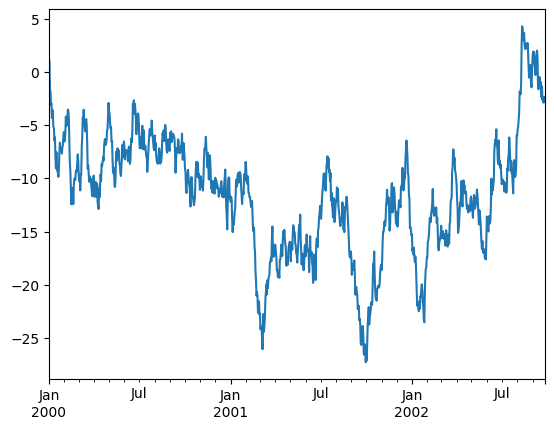

In [290]:
ts.plot()

<Figure size 640x480 with 0 Axes>

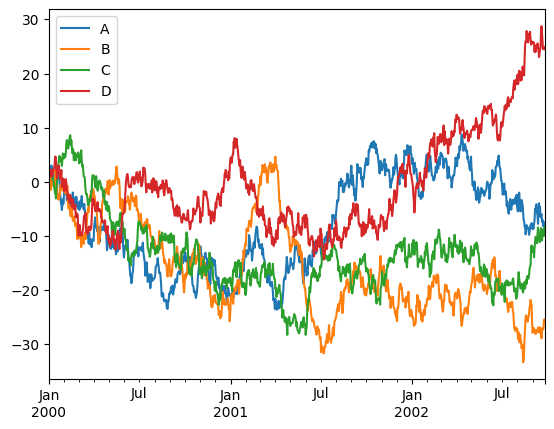

In [301]:
ts = pd.DataFrame(np.random.randn(1000,4), index=ts.index,columns=['A','B','C','D'])
ts=ts.cumsum()
plt.figure()
ts.plot()
plt.legend(loc='best')